In [1]:
#Importing Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM 

%matplotlib inline

In [2]:
# Loading the Data
data_path = '../Downloads/CSV.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250,16.750,14.250,16.500,15.047827,1601500
1,1996-08-12,16.500,16.750,16.375,16.500,15.047827,260900
2,1996-08-13,16.500,16.750,16.375,16.375,14.933824,162800
3,1996-08-14,16.375,16.625,16.375,16.375,14.933824,59500
4,1996-08-15,16.625,16.625,16.375,16.625,15.161817,62300


In [4]:
data_training = data[data['Date'] < '2020-01-01'].copy()
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250,16.750,14.250,16.500,15.047827,1601500
1,1996-08-12,16.500,16.750,16.375,16.500,15.047827,260900
2,1996-08-13,16.500,16.750,16.375,16.375,14.933824,162800
3,1996-08-14,16.375,16.625,16.375,16.375,14.933824,59500
4,1996-08-15,16.625,16.625,16.375,16.625,15.161817,62300


In [5]:
training_data = data_training.drop(columns=['Date', 'Adj Close'])

In [6]:
training_data.head()

,Open,High,Low,Close,Volume
0,14.250,16.750,14.250,16.500,1601500
1,16.500,16.750,16.375,16.500,260900
2,16.500,16.750,16.375,16.375,162800
3,16.375,16.625,16.375,16.375,59500
4,16.625,16.625,16.375,16.625,62300


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [8]:
X_train = []
y_train = []

In [9]:
training_data.shape

(5888, 5)

In [10]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((5828, 60, 5), (5828,))

In [13]:
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)),
    Dropout(0.2),
    
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),
    
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),
    
    LSTM(units=120, activation='relu'),
    Dropout(0.5),
    
    Dense(units=1)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
183/183 [==============================] - 32s 173ms/step - loss: 0.0173
Epoch 2/20
183/183 [==============================] - 31s 169ms/step - loss: 0.0073
Epoch 3/20
183/183 [==============================] - 31s 170ms/step - loss: 0.0060
Epoch 4/20
183/183 [==============================] - 31s 168ms/step - loss: 0.0056
Epoch 5/20
183/183 [==============================] - 31s 169ms/step - loss: 0.0056
Epoch 6/20
183/183 [==============================] - 31s 169ms/step - loss: 0.0050
Epoch 7/20
183/183 [==============================] - 31s 172ms/step - loss: 0.0051
Epoch 8/20
183/183 [==============================] - 31s 170ms/step - loss: 0.0050
Epoch 9/20
183/183 [==============================] - 31s 171ms/step - loss: 0.0047
Epoch 10/20
183/183 [==============================] - 31s 170ms/step - loss: 0.0047
Epoch 11/20
183/183 [==============================] - 32s 174ms/step - loss: 0.0046
Epoch 12/20
183/183 [==============================] - 34s 187ms/step - lo

In [17]:
# Preparing the test data
data_test = data[data['Date'] >= '2020-01-01'].copy()

In [18]:
data_test.shape

(150, 7)

In [19]:
# Dropping Columns
data_test = data_test.drop(columns=['Date', 'Adj Close'])

In [20]:
# Preparation of the test data
last_60_days = data_training.tail(60)
last_60_days = last_60_days.drop(columns=['Date', 'Adj Close'])
last_60_days = last_60_days.append(data_test, ignore_index=True)

In [21]:
test_data = scaler.transform(last_60_days)

In [22]:
X_test = []
y_test = []

In [23]:
for i in range(60, test_data.shape[0]):
    X_test.append(test_data[i-60:i])
    y_test.append(test_data[i, 0])

In [24]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((150, 60, 5), (150,))

In [25]:
# Predicting Output
y_pred = model.predict(X_test)

In [26]:
y_pred.shape, y_test.shape, X_test.shape

((150, 1), (150,), (150, 60, 5))

In [27]:
# Scale the data
scaler.scale_

array([3.59550562e-02, 3.57941834e-02, 3.60003600e-02, 3.59550562e-02,
       4.82299605e-07])

In [28]:
scale = 1 / 6.96864160e-02
y_pred *= scale
y_test *= scale

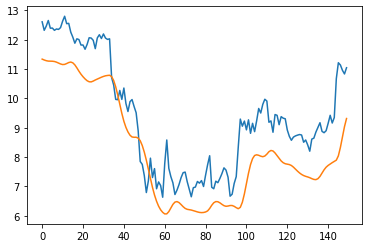

In [29]:
plt.plot(y_test)
plt.plot(y_pred)
plt.show()